In [11]:
from sklearn.datasets import make_moons
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import euclidean_distances


from tensorflow.keras import optimizers
from keras.models import Sequential
from keras.layers import Dense

from DEN import DENlayer
from DMN import DMNlayer
from DSN import DSNlayer




from PreTrain.HpC import HSpC
from PreTrain.HpC import HEpC
from PreTrain.HpC import HBpC

from PreTrain.kmeans import bkmeans
from PreTrain.kmeans import ekmeans
from PreTrain.kmeans import skmeans

#HEpC, HSpC

#from PreTrain.kmeans import bkmeans, ekmeans, skmeans

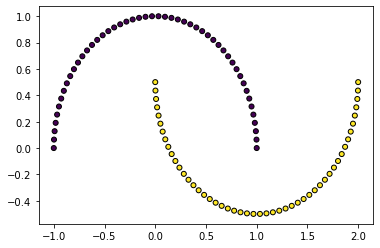

In [2]:
x,y = make_moons(n_samples=100, shuffle=True, noise=None, random_state=None)
x=x*1


fig, ax = plt.subplots()

ax.scatter(x[:, 0], x[:, 1], marker='o', c=y,
            s=25, edgecolor='k')


plt.show()


In [5]:
#y=[0,0,1,0,0]
unidades=3
dendrites  = HBpC.HBpC(x,y,0.0001)
dendrites  = HEpC.HEpC(x,y)
dendrites  = HSpC.HSpC(x,y,0.0001)
dendrites  = bkmeans.bkmeans(x,y,[3,3,3],0.01)
dendrites  = ekmeans.ekmeans(x,y,[3])
dendrites  = skmeans.skmeans(x,y,[unidades],0.01)



In [6]:
len(dendrites[0])
print(y)
dendrites

[1 1 0 1 0 0 0 1 0 0 1 1 1 0 0 1 1 0 1 0 0 1 0 0 1 0 0 1 1 0 0 0 1 0 1 0 0
 1 0 0 0 0 1 0 0 1 1 1 0 1 0 1 1 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 0 0 1 1 0 1
 0 1 0 1 1 0 0 1 1 1 0 1 0 1 0 0 0 1 1 1 0 1 0 1 0 0]


(array([[[-0.84837837,  0.44259845]],
 
        [[ 0.80861026,  0.49018429]],
 
        [[-0.06130818,  0.95492437]]]),
 array([0.47784881, 0.53622303, 0.47784881]))

In [30]:


def TestModel():  
   model = Sequential()
   model.add(DSNlayer(2,dendrites, activation = "tanh", input_shape = (np.shape(x)[1],)))
   #model.add(Dense(3, activation = 'relu' ))
   model.add(Dense(1, activation = 'sigmoid')) 
   return model

model = TestModel()
model.summary()
model.compile(optimizer = optimizers.RMSprop(learning_rate = 0.1),
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 ds_nlayer_8 (DSNlayer)      (None, 3)                 9         
                                                                 
 dense_8 (Dense)             (None, 1)                 4         
                                                                 
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [31]:
history = model.fit(x, y,
                     epochs = 100,
                     batch_size = 128)

Epoch 1/100
1/1 [==============================] - 0s 456ms/step - loss: 0.7279 - accuracy: 0.6400
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 0.5195 - accuracy: 0.8100
Epoch 3/100
1/1 [==============================] - 0s 3ms/step - loss: 0.4921 - accuracy: 0.7800
Epoch 4/100
1/1 [==============================] - 0s 3ms/step - loss: 0.4518 - accuracy: 0.8300
Epoch 5/100
1/1 [==============================] - 0s 3ms/step - loss: 0.4113 - accuracy: 0.8200
Epoch 6/100
1/1 [==============================] - 0s 3ms/step - loss: 0.3869 - accuracy: 0.8700
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: 0.3718 - accuracy: 0.8400
Epoch 8/100
1/1 [==============================] - 0s 2ms/step - loss: 0.3615 - accuracy: 0.8700
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 0.3574 - accuracy: 0.8400
Epoch 10/100
1/1 [==============================] - 0s 2ms/step - loss: 0.3586 - accuracy: 0.8800
Epoch 11/100
1/1 [=========

1/1 [==============================] - 0s 3ms/step - loss: 0.1593 - accuracy: 0.9600
Epoch 85/100
1/1 [==============================] - 0s 3ms/step - loss: 0.1601 - accuracy: 0.9500
Epoch 86/100
1/1 [==============================] - 0s 3ms/step - loss: 0.1568 - accuracy: 0.9600
Epoch 87/100
1/1 [==============================] - 0s 3ms/step - loss: 0.1571 - accuracy: 0.9500
Epoch 88/100
1/1 [==============================] - 0s 3ms/step - loss: 0.1540 - accuracy: 0.9600
Epoch 89/100
1/1 [==============================] - 0s 3ms/step - loss: 0.1537 - accuracy: 0.9500
Epoch 90/100
1/1 [==============================] - 0s 3ms/step - loss: 0.1509 - accuracy: 0.9600
Epoch 91/100
1/1 [==============================] - 0s 3ms/step - loss: 0.1501 - accuracy: 0.9500
Epoch 92/100
1/1 [==============================] - 0s 3ms/step - loss: 0.1477 - accuracy: 0.9600
Epoch 93/100
1/1 [==============================] - 0s 2ms/step - loss: 0.1466 - accuracy: 0.9500
Epoch 94/100
1/1 [===============

[<tf.Variable 'ds_nlayer_8/Centroids:0' shape=(3, 1, 2) dtype=float32, numpy=
array([[[-0.77164084,  1.7254462 ]],

       [[ 1.0817016 ,  0.4745864 ]],

       [[ 0.11011313,  0.2755728 ]]], dtype=float32)>, <tf.Variable 'ds_nlayer_8/Radius:0' shape=(3, 1) dtype=float32, numpy=
array([[2.0047734 ],
       [0.27544513],
       [0.4833512 ]], dtype=float32)>, <tf.Variable 'dense_8/kernel:0' shape=(3, 1) dtype=float32, numpy=
array([[-6.8109407],
       [-4.6778665],
       [ 5.2952886]], dtype=float32)>, <tf.Variable 'dense_8/bias:0' shape=(1,) dtype=float32, numpy=array([0.07199088], dtype=float32)>]


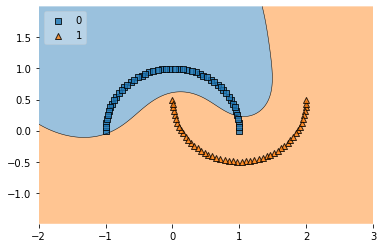

In [32]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x,y, clf=model, legend=2)
print(model.weights)


[<tf.Variable 'ds_nlayer_8/Centroids:0' shape=(3, 1, 2) dtype=float32, numpy=
array([[[-0.77164084,  1.7254462 ]],

       [[ 1.0817016 ,  0.4745864 ]],

       [[ 0.11011313,  0.2755728 ]]], dtype=float32)>, <tf.Variable 'ds_nlayer_8/Radius:0' shape=(3, 1) dtype=float32, numpy=
array([[2.0047734 ],
       [0.27544513],
       [0.4833512 ]], dtype=float32)>, <tf.Variable 'dense_8/kernel:0' shape=(3, 1) dtype=float32, numpy=
array([[-6.8109407],
       [-4.6778665],
       [ 5.2952886]], dtype=float32)>, <tf.Variable 'dense_8/bias:0' shape=(1,) dtype=float32, numpy=array([0.07199088], dtype=float32)>]


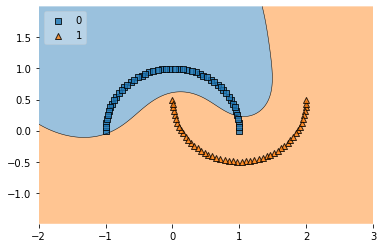

In [33]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x,y, clf=model, legend=2)
print(model.weights)


Text(0, 0.5, 'x2')

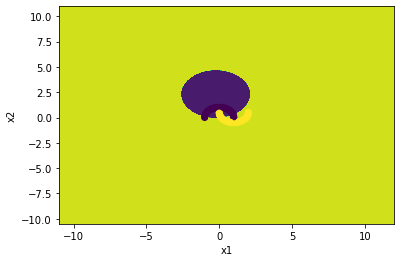

In [24]:
# Decision Boundary
h = 0.02
scale = 10
x_min, x_max = x[:, 0].min() - scale, x[:, 0].max() + scale
y_min, y_max = x[:, 1].min() - scale, x[:, 1].max() + scale
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = np.c_[xx.ravel(), yy.ravel()]
out = model.predict(Z, batch_size = 1024, verbose = 0)

out = (out >= 0.5).astype(int)
out = out.reshape(xx.shape)

plt.contourf(xx, yy, out)
plt.scatter(x[:, 0], x[:, 1], c = y)
plt.xlabel('x1')
plt.ylabel('x2')

In [ ]:
h = 0.02
scale = 1
x_min, x_max = x[:, 0].min() - scale, x[:, 0].max() + scale
y_min, y_max = x[:, 1].min() - scale, x[:, 1].max() + scale
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = np.c_[xx.ravel(), yy.ravel()]
out = model.predict(Z, batch_size = 1024, verbose = 0)

out = (out <= 0.5).astype(int)
out = out.reshape(xx.shape)

plt.contourf(xx, yy, out)
plt.scatter(x[:, 0], x[:, 1], c = y)
plt.xlabel('x1')
plt.ylabel('x2')

In [ ]:
from sklearn.datasets import make_blobs
from keras.utils import to_categorical

Xb, yb = make_blobs(n_samples=300, centers=3, n_features=2,
                  random_state=0)

Yb = to_categorical(yb)
#Yb = Yb[:,1:] 
#print(Yb)



fig, ax = plt.subplots()

ax.scatter(Xb[:, 0], Xb[:, 1], marker='o', c=yb,
            s=25, edgecolor='k')

plt.show()

In [ ]:
print(len(yb))
#dendrites = HBpC(Xb,yb)
#dendrites = HEpC(Xb,yb)
dendrites = HSpC.HSpC(Xb,yb)
#dendrites = bkmeans(Xb,yb,[3,3,3])
#dendrites = ekmeans(Xb,yb,[5,5,5])
#dendrites = skmeans(Xb,yb,[5,5,5])

print(dendrites)


In [ ]:
dendrites[0].shape

In [ ]:
def TestModel():  
   model = Sequential()
   model.add(DSNlayer(40, dendrites,activation='relu', input_shape = (np.shape(Xb)[1],)))
   
   #model.add(DENlayer(6, activation = 'sigmoid' ))
   model.add(Dense(3, activation = 'softmax')) 
   return model

#yb =  to_categorical(yb, dtype ="uint8") 

model = TestModel()
model.summary()
model.compile(optimizer = optimizers.RMSprop(lr = 0.01),
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])



In [ ]:
history = model.fit(Xb, Yb,
                    epochs = 2000,
                    batch_size = 128)


In [ ]:
# Decision Boundary
h = 0.02
scale = 1
x_min, x_max = Xb[:, 0].min() - scale, Xb[:, 0].max() + scale
y_min, y_max = Xb[:, 1].min() - scale, Xb[:, 1].max() + scale
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = np.c_[xx.ravel(), yy.ravel()]
out = model.predict(Z, batch_size = 1024, verbose = 0)
print(out.shape)

print(type(out))
out2 = np.zeros(out.shape[0])

for n in range(out.shape[0]):
    out2[n] = np.argmax(out[n])
          
    
print((out2))
out2 = out2.reshape(xx.shape)

#out = (out >= 0.5).astype(int)
#out = out.reshape(xx.shape)

plt.contourf(xx, yy, out2)
plt.scatter(Xb[:, 0], Xb[:, 1], c = yb)
plt.xlabel('x1')
plt.ylabel('x2')